In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display_html 

In [3]:
df = sns.load_dataset("anscombe")

In [4]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [5]:
Q1 = df.loc[df['dataset'] == 'I']

In [6]:
print(Q1)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68


In [7]:
Q2 = df.loc[df['dataset'] == 'II']

In [8]:
Q2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


In [9]:
Q3 = df.loc[df['dataset'] == 'III']

In [10]:
Q3


,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [11]:
Q4 = df.loc[df['dataset'] == 'IV']

In [12]:
Q4

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


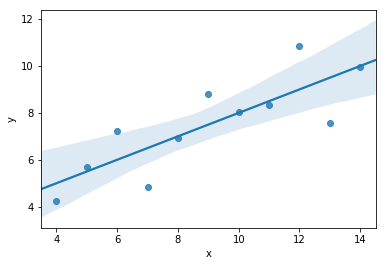

In [13]:
sns.regplot(x="x", y="y", data=Q1)
plt.show()

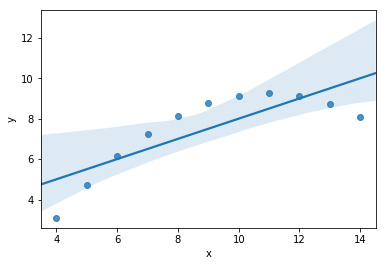

In [14]:
sns.regplot(x="x", y="y", data=Q2)
plt.show()

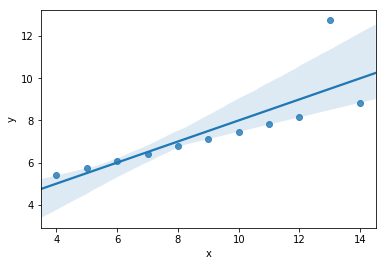

In [15]:
sns.regplot(x="x", y="y", data=Q3)
plt.show()

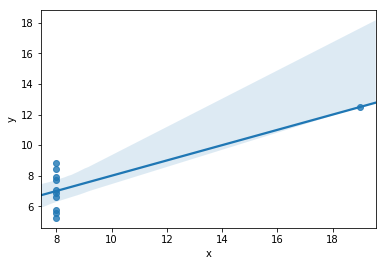

In [16]:
sns.regplot(x="x", y="y", data=Q4)
plt.show()

In [20]:
Q1_describe = Q1.describe() 
Q2_describe = Q2.describe() 
Q3_describe = Q3.describe() 
Q4_describe = Q4.describe() 

Q1_styler = Q1_describe.style.set_table_attributes("style='display:inline'").set_caption('Q 1')
Q2_styler = Q2_describe.style.set_table_attributes("style='display:inline'").set_caption('Q 2')
Q3_styler = Q3_describe.style.set_table_attributes("style='display:inline'").set_caption('Q 3')
Q4_styler = Q4_describe.style.set_table_attributes("style='display:inline'").set_caption('Q 4')

display_html(Q1_styler._repr_html_()+Q2_styler._repr_html_()+Q3_styler._repr_html_()+Q4_styler._repr_html_(), raw=True)

# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side


,x,y
count,11,11
mean,9,7.50091
std,3.31662,2.03157
min,4,4.26
25%,6.5,6.315
50%,9,7.58
75%,11.5,8.57
max,14,10.84
,x,y
count,11,11


In [29]:
Q1_var = Q1.var() 
Q1_var_table = pd.DataFrame(Q1_var, columns=["Q 1"])

Q2_var = Q2.var() 
Q2_var_table = pd.DataFrame(Q2_var, columns=["Q 2"])

Q3_var = Q3.var() 
Q3_var_table = pd.DataFrame(Q3_var, columns=["Q 3"])

Q4_var = Q4.var() 
Q4_var_table = pd.DataFrame(Q4_var, columns=["Q 4"])

Q1_styler_var = Q1_var_table.style.set_table_attributes("style='display:inline'").set_caption('Q 1')
Q2_styler_var = Q2_var_table.style.set_table_attributes("style='display:inline'").set_caption('Q 2')
Q3_styler_var = Q3_var_table.style.set_table_attributes("style='display:inline'").set_caption('Q 3')
Q4_styler_var = Q4_var_table.style.set_table_attributes("style='display:inline'").set_caption('Q 4')

display_html(Q1_styler_var._repr_html_()+Q2_styler_var._repr_html_()+Q3_styler_var._repr_html_()+Q4_styler_var._repr_html_(), raw=True)
# https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook

,Q 1
x,11
y,4.12727
,Q 2
x,11
y,4.12763
,Q 3
x,11
y,4.12262
,Q 4
x,11


In [34]:
np.sqrt(Q1_var["x"])

3.3166247903554

In [44]:
Q1_x = Q1["x"]

In [54]:
print(np.var(Q1["x"]))

10.0
